روی دیتای

cardio_train1

شبکه عمیق خود را به صورت های

sequentional functional classbase

و تیون کردن هایپر پارمتر ها ترین کنید

1- حتما تنسور بورد داشته باشد و به صورت یک لینک داده شود

2-EarlyStopping

3-  در ابتدای هر ایپاک شماره ایپاک و مقدار لاس را در متن زیر پرینت کند

in ... epoch loss is ...


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
import logging
tf.get_logger().setLevel(logging.ERROR)
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.callbacks import EarlyStopping

In [390]:
df= pd.read_csv("cardio_train1.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [391]:
df=df.drop(['id'],axis=1)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


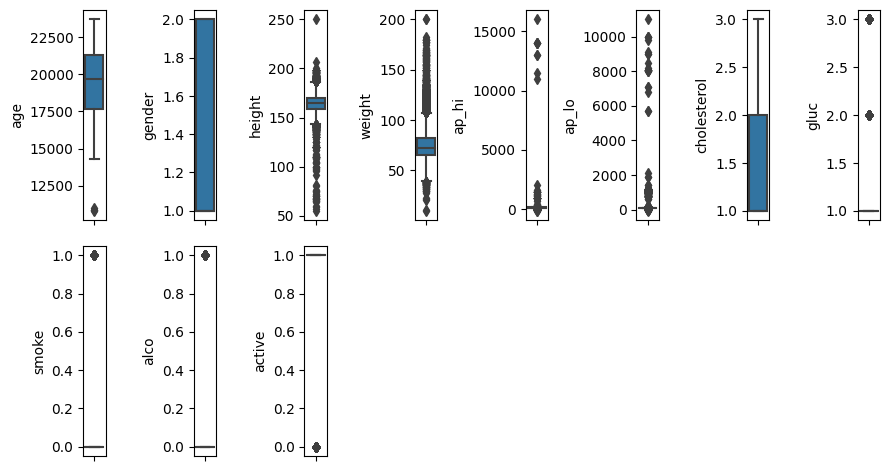

In [393]:
column=df.columns.drop(['cardio'])

plt.figure(figsize=(9,5 ))
no=0
for col in column:
    no+=1
    plt.subplot(2,8,no)
    plt.tight_layout()
    # plt.axis('off')
    sns.boxplot(y=df[col]) 

In [394]:
cols = ['age','height','weight','ap_hi','ap_lo']
Q1=df.quantile(0.15)
Q3=df.quantile(0.85)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()
df.describe()



,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000,68151.000000
mean,35002.223973,19461.846194,1.348036,164.424088,73.895565,126.316019,81.204986,1.362959,1.224604,0.087658,0.053088,0.803539,0.492553
std,20204.498124,2468.843863,0.476351,7.803836,13.817684,16.085418,9.268157,0.677766,0.570657,0.282799,0.224211,0.397324,0.499948
min,0.000000,10798.000000,1.000000,132.000000,21.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17495.500000,17655.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35015.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52484.500000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,23713.000000,2.000000,196.000000,132.000000,185.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [395]:
df=df.drop(['index'],axis=1)

In [396]:
df.shape

(68151, 12)

# Preparing to modeling

In [397]:
X=df.drop(['cardio'],axis=1).values
y=df.filter(['cardio'],axis=1).values

In [398]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train= stdsc.fit_transform(X)

In [399]:
X_val = X[45000:60000]
y_val = y[45000:60000]
X_train = X[:45000]
y_train = y[:45000]
X_test=X[60000:]
y_test=y[60000:]

In [400]:
y_train = y_train.astype('uint8')

# 1.Sequentional

In [401]:
early_stoping=EarlyStopping(monitor='loss', mode='max', verbose=1, patience=10)

In [405]:
tf.random.set_seed(42)
model = keras.Sequential([
layers.Dense(300, activation="relu"),
layers.Dense(100, activation="relu"),
layers.Dense(2,activation='softmax')
])

In [406]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

In [407]:
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_val, y_val),callbacks=[early_stoping])


Epoch 1/20
1407/1407 [==============================] - 7s 4ms/step - loss: 59.1780 - accuracy: 0.5070 - val_loss: 3.5609 - val_accuracy: 0.5298
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 24.5334 - accuracy: 0.5164 - val_loss: 9.2367 - val_accuracy: 0.5078
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 10.3386 - accuracy: 0.5317 - val_loss: 20.3677 - val_accuracy: 0.5078
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 5.5834 - accuracy: 0.5564 - val_loss: 2.5264 - val_accuracy: 0.5447
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 2.8680 - accuracy: 0.5781 - val_loss: 0.7660 - val_accuracy: 0.6993
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 2.1128 - accuracy: 0.5889 - val_loss: 0.7142 - val_accuracy: 0.6897
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5325 - accuracy: 0.5910 - val_loss: 1.5040 - val_accur

In [410]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["loss"]
        print(f"in Epoch={epoch}, the loss is={ratio:.2f}")

In [426]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train), (y_train), epochs=10,
    validation_data=((X_val), (y_val)),
    callbacks=[val_train_ratio_cb], verbose=0)

in Epoch=0, the loss is=0.69
in Epoch=1, the loss is=0.69
in Epoch=2, the loss is=0.69
in Epoch=3, the loss is=0.69
in Epoch=4, the loss is=0.69
in Epoch=5, the loss is=0.69
in Epoch=6, the loss is=0.69
in Epoch=7, the loss is=0.69
in Epoch=8, the loss is=0.69
in Epoch=9, the loss is=0.69


# 2.functional

In [412]:
inputs = keras.Input(shape=(11,))

In [413]:
hidden1 = layers.Dense(300, activation="relu")(inputs)
hidden2 = layers.Dense(100, activation="relu")(hidden1)
hidden3 = layers.Dense(100, activation="relu")(hidden2)
concat = layers.concatenate([inputs, hidden3])
outputs = layers.Dense(2, activation="softmax")(concat)

In [414]:
model_F = keras.Model(inputs=inputs, outputs=outputs)


In [415]:
model_F.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 300)          3600        ['input_1[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 100)          30100       ['dense_7[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 100)          10100       ['dense_8[0][0]']                
                                                                                              

In [416]:
model_F.compile(loss="sparse_categorical_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

In [417]:
history_F = model_F.fit(X_train, y_train, epochs=20,
validation_data=(X_val, y_val),callbacks=[early_stoping])

Epoch 1/20
1407/1407 [==============================] - 8s 5ms/step - loss: 34.1759 - accuracy: 0.4952 - val_loss: 8.4729 - val_accuracy: 0.4922
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 18.6447 - accuracy: 0.5083 - val_loss: 10.2738 - val_accuracy: 0.4922
Epoch 3/20
1407/1407 [==============================] - 6s 5ms/step - loss: 9.9727 - accuracy: 0.5336 - val_loss: 26.4853 - val_accuracy: 0.4922
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 5.8778 - accuracy: 0.5620 - val_loss: 1.1979 - val_accuracy: 0.6947
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 6.5930 - accuracy: 0.5676 - val_loss: 1.5752 - val_accuracy: 0.6588
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.6350 - accuracy: 0.6040 - val_loss: 1.5547 - val_accuracy: 0.6525
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.8040 - accuracy: 0.5886 - val_loss: 5.0480 - val_accur

In [275]:
eval_results = model.evaluate((X_test), (y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5151


In [237]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model_F.fit(
    (X_train), (y_train), epochs=10,
    validation_data=((X_val), (y_val)),
    callbacks=[val_train_ratio_cb], verbose=0)

in Epoch=0, the loss is=1.17
in Epoch=1, the loss is=1.15
in Epoch=2, the loss is=1.23
in Epoch=3, the loss is=1.21
in Epoch=4, the loss is=1.15
in Epoch=5, the loss is=1.19
in Epoch=6, the loss is=1.10
in Epoch=7, the loss is=1.13
in Epoch=8, the loss is=1.17
in Epoch=9, the loss is=1.14


# Using tensorboard for sequentional model

In [176]:
!pip install -q -U tensorboard-plugin-profile

In [181]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [430]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
norm_layer.adapt(X_train)

In [431]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

Epoch 1/10


2023-03-04 11:12:47.936478: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-04 11:12:47.936538: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-04 11:12:47.938255: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


 159/1407 [==>...........................] - ETA: 4s - loss: 0.7632 - accuracy: 0.5055

2023-03-04 11:12:49.253736: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-04 11:12:49.253790: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


 227/1407 [===>..........................] - ETA: 5s - loss: 0.7420 - accuracy: 0.5025

2023-03-04 11:12:49.826480: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-03-04 11:12:49.865706: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-04 11:12:49.866009: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: my_logs/run_2023_03_04_08_23_24/plugins/profile/2023_03_04_11_12_49/sara-HP-1000-Notebook-PC.xplane.pb


1407/1407 [==============================] - 7s 4ms/step - loss: 0.7034 - accuracy: 0.5085 - val_loss: 0.6948 - val_accuracy: 0.5078
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6937 - accuracy: 0.5084 - val_loss: 0.6940 - val_accuracy: 0.5079
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6931 - accuracy: 0.5084 - val_loss: 0.6940 - val_accuracy: 0.5079
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6931 - accuracy: 0.5084 - val_loss: 0.6940 - val_accuracy: 0.5079
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6931 - accuracy: 0.5084 - val_loss: 0.6940 - val_accuracy: 0.5079
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6931 - accuracy: 0.5084 - val_loss: 0.6940 - val_accuracy: 0.5079
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6931 - accuracy: 0.5084 - val_loss: 0.6940 - val_accuracy: 0.5079
Epo

In [432]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [357]:
from IPython.display import display, HTML

display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

# Tune hyperparameters 

In [137]:
import keras_tuner as kt

In [377]:
def build_model(hp):
    global model
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8,
    default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4,max_value=1e-2,sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer =tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer =tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model= tf.keras.Sequential()
        model.add(100, activation='relu')
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons,
        activation="relu"))
        model.add(tf.keras.layers.Dense(2, activation="softmax"))
        model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
    return model

In [378]:
random_search_tuner = kt.RandomSearch(build_model, objective="accuracy", max_trials=5, overwrite=True, seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_val, y_val))

Trial 5 Complete [00h 00m 00s]

Best accuracy So Far: 0.5326499938964844
Total elapsed time: 00h 01m 19s


In [379]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 5,
 'n_neurons': 25,
 'learning_rate': 0.0006562536901904111,
 'optimizer': 'sgd'}

In [382]:
best_trial.metrics.get_last_value("val_accuracy")

0.526199996471405

linux

1- با چه دستوری مسیر پایتون را پیدا کنیم



2- با چه دستوری از نوع فایل مطمین میشبم



3-منظور از اعداد نشان داده شده بعد از زدت دستور زیر چیست



4- دستوری که دایرکتوری بسازد که درون آن یک دایرکتوری دیگر هم هست



5- با چه دستوری فایل بالا را به صورت ریکرسیو پاک می کنید



6- با چه کامتد هایی میتوان فایل را خواند 



7- برای تعقیب تعییرات یک فایل چه دستوری را پیشنهاد میدهید


8- معادل دستورپرینت در بش چیست 



### 1. whereis python3                  
### dpkg -S python3

### 2.file -f filenames.lst

### 3.

### 4.mkdir -p 

### 5.use the rm command with the recursive option, -r 

### 6.  1.Cat command  2.less command  3.more command   4.nl command  5.gnome-open command  6.head command   7.tail command

### 7.Tail and grep                                                
### -mtime n                             
